# 1 ライブラリとデータ

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0),(1))])

root = './data2'
mnist_train = datasets.MNIST(root=root,download=True,train=True,transform=transform)
mnist_test = datasets.MNIST(root=root,download=True,train=False,transform=transform)

train_dataloader = DataLoader(mnist_train,batch_size=100,shuffle=True)
test_dataloader = DataLoader(mnist_test,batch_size=10000,shuffle=False)

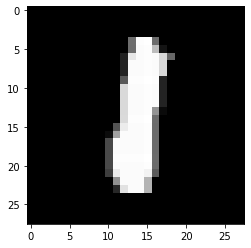

In [3]:
x, t = next(iter(train_dataloader))
image = x[1,].view(28,28).detach().numpy()
plt.imshow(image,cmap='binary_r')

# 2 Convolutional層

In [4]:
conv1_1 = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1) # サイズを変化させない
conv1_2 = nn.Conv2d(1, 1, kernel_size=6, stride=1, padding=1) # フィルターサイズを大きくする
conv1_3 = nn.Conv2d(1, 1, kernel_size=3, stride=3, padding=1) # ストライドを大きくする
conv1_4 = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=4) # パディングを大きくする
conv2_1 = nn.Conv2d(1, 8, kernel_size=4, stride=2, padding=1) # 通常1
conv2_2 = nn.Conv2d(8, 16, kernel_size=4, stride=2, padding=1) # 通常2

## 2.1 サイズを変化させない

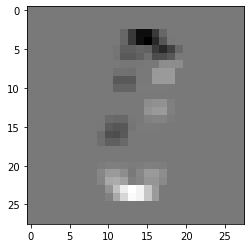

In [5]:
conv1_1.weight = torch.nn.Parameter(torch.tensor([[[[1,1,1],[0,0,0],[-1,-1,-1]]]]).float())
y1 = conv1_1(x[1,].unsqueeze(0))
image = y1.view(28,28).detach().numpy()
plt.imshow(image,cmap='binary_r')

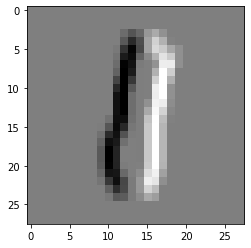

In [6]:
conv1_1.weight = torch.nn.Parameter(torch.tensor([[[[1,0,-1],[1,0,-1],[1,0,-1]]]]).float())
y1 = conv1_1(x[1,].unsqueeze(0))
image = y1.view(28,28).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 2.2 フィルターのサイズを大きくする

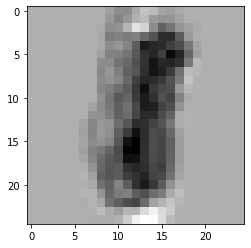

In [7]:
y2 = conv1_2(x[1,].unsqueeze(0))
image = y2.view(25,25).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 2.3 strideを大きくする

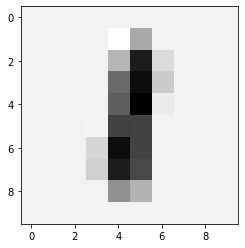

In [8]:
y3 = conv1_3(x[1,].unsqueeze(0))
image = y3.view(10,10).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 2.4 paddingを大きくする

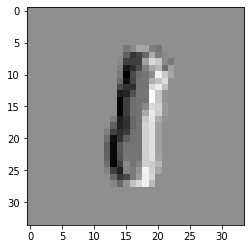

In [9]:
y4 = conv1_4(x[1,].unsqueeze(0))
image = y4.view(34,34).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 2.5 通常

In [10]:
y_1 = conv2_1(x[1,].unsqueeze(0))
y_1.shape

torch.Size([1, 8, 14, 14])

In [11]:
y_2 = conv2_2(y_1)
y_2.shape

torch.Size([1, 16, 7, 7])

In [12]:
y_2.view(-1).shape

torch.Size([784])

# 3 Pooling層

In [13]:
pool1 = nn.MaxPool2d(2) # maxプーリング
pool2 = nn.MaxPool2d(4) # maxプーリング(カーネルサイズ大きく)
pool3 = nn.AvgPool2d(2) # averageプーリング

## 3.1 maxプーリング

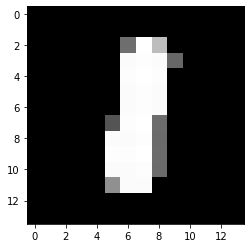

In [14]:
z1 = pool1(x[1,].unsqueeze(0))
image = z1.view(14,14).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 3.2 maxプーリング(カーネルサイズ大きく)

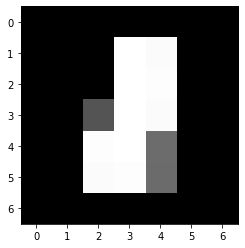

In [15]:
z2 = pool2(x[1,].unsqueeze(0))
image = z2.view(7,7).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 3.3 averageプーリング

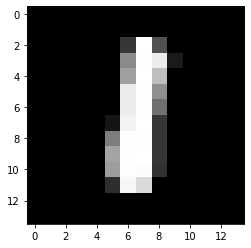

In [16]:
z3 = pool3(x[1,].unsqueeze(0))
image = z3.view(14,14).detach().numpy()
plt.imshow(image,cmap='binary_r')

## 3.4 Fの使用

In [17]:
pool = nn.MaxPool2d(2)
z = pool(x[1,].unsqueeze(0))
z.shape

torch.Size([1, 1, 14, 14])

In [18]:
z = F.max_pool2d(x[1,].unsqueeze(0),2)
z.shape

torch.Size([1, 1, 14, 14])